<a href="https://colab.research.google.com/github/nygeiger/Panda-Data-Basics/blob/main/HW01_NylesGeiger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Homework 1 - Data Basics
### 2/9/2022
### *** Nyles Geiger ***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bank_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1oQMcpoR3QC7w_sWIbtyid2N2j0o49_pk')

In [3]:
bank_age_df = bank_df["age"]
bank_income_df = bank_df["income"]
bank_children_df = bank_df["income"]
print("5*****")
print("A:")
print("The min, max, and average age are: " + str(bank_age_df.max()) + ", " + str(bank_age_df.min()) + ", and " + str(bank_age_df.mean()))
print("The min, max, and average income are: " + str(bank_income_df.max()) + ", " + str(bank_income_df.min()) + ", and " + str(bank_income_df.mean())) 
print("The min, max, and average children are: " + str(bank_children_df.max()) + ", " + str(bank_children_df.min()) + ", and " + str(bank_children_df.mean()))
print()
print("B: ")
print(str(len(bank_df["car"] == "YES")) + " customers have a car")
print()
gender_bin = pd.get_dummies(bank_df["region"], prefix="region")
print("C:")
print(bank_df.groupby("region")["children"].mean().reset_index().sort_values("children", ascending=False))
print()
print("D:")
print("Region with highest std of Age:")
print(bank_df.groupby("region")["age"].std().reset_index().sort_values("age", ascending=False).iloc[0])
print("This means that the difference between ages is generaly greater in surbabn regions")
print()

with_sav_acct = bank_df.groupby("savings_acct")["income"].mean().reset_index().iloc[1]
withot_sav_acct = bank_df.groupby("savings_acct")["income"].mean().reset_index().iloc[0]
print("E:")
print("the difference in average income between people who have a savings account and those who don't is " + str(with_sav_acct.income - withot_sav_acct.income))
# average_with_savings = bank_df.groupby("save_acct")["income"].std().reset_index().sort_values("age", ascending=False).iloc[0]
# average_without_savings = 
print()
print("F:")
# tempVari = bank_df.groupby("pep").mean(numeric_only=None)
print(bank_df.groupby("pep").mean())
print("Those with a PEP are typically older, have a higher income, and have less kids on average")




5*****
A:
The min, max, and average age are: 67, 18, and 42.395
The min, max, and average income are: 63130.1, 5014.21, and 27524.031216666666
The min, max, and average children are: 63130.1, 5014.21, and 27524.031216666666

B: 
600 customers have a car

C:
       region  children
1       RURAL  1.229167
3        TOWN  1.000000
2    SUBURBAN  0.967742
0  INNER_CITY  0.951673

D:
Region with highest std of Age:
region     SUBURBAN
age       15.222039
Name: 2, dtype: object
This means that the difference between ages is generaly greater in surbabn regions

E:
the difference in average income between people who have a savings account and those who don't is 7417.437714664175

F:
           age        income  children
pep                                   
NO   40.098160  24900.953374  1.067485
YES  45.127737  30644.919453  0.945255
Those with a PEP are typically older, have a higher income, and have less kids on average


In [4]:
income_std = bank_df["income"].copy()

# z score values
for col in range(len(income_std)):
  income_std[col] = (income_std[col] - income_std.mean())/income_std.std(ddof=0)

print("6*****")
print("The mean of the normalized income attribute is", income_std.mean(), "\nand the standard of deviation is", income_std.std(),".")
print("This is because the values have been adjusted to represent their distance from the mean.")

6*****
The mean of the normalized income attribute is 1.3222131122304375 
and the standard of deviation is 2.1560216513558137 .
This is because the values have been adjusted to represent their distance from the mean.


In [5]:
# 7: Discretize age
age_disc = bank_df["age"].copy()
cut_labels_4 = ['young', 'middle age', 'old']
cut_bins = [0, 27, 62, 1000]
age_disc = pd.cut(age_disc, bins=cut_bins, labels=cut_labels_4)
print("7****")
print(age_disc.value_counts())

7****
middle age    406
young         126
old            68
Name: age, dtype: int64


In [6]:
# 8: Min Max
# bank_norm = bank_df[["income", "age", "children"]].copy()
# print(bank_df.dtypes)
bank_norm = bank_df.copy()

# min - max data
for column in bank_norm.columns:
  if (column == "age" or column == "income" or column == "children"):
    bank_norm[column] = (bank_norm[column] - bank_norm[column].min()) / (bank_norm[column].max() - bank_norm[column].min()) 
print("8*****")
print("The mean of the normalized income attribute is:\n\n", bank_norm.mean(), "\nand the standard of deviation is:\n\n", bank_norm.std())
print()
print("These values are different form z-score norm because these the values\n were normalized according to the min and max values opposed\n to the mean")

8*****
The mean of the normalized income attribute is:

 age         0.497857
income      0.387326
children    0.337222
dtype: float64 
and the standard of deviation is:

 age         0.294387
income      0.221961
children    0.352251
dtype: float64

These values are different form z-score norm because these the values
 were normalized according to the min and max values opposed
 to the mean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


In [7]:
#9: 
bank_norm = bank_norm.iloc[:, 1:]
bank_norm = pd.get_dummies(bank_norm)
print("9*****")
print(bank_norm)

9*****
          age    income  children  gender_FEMALE  gender_MALE  \
0    0.612245  0.215634  0.333333              1            0   
1    0.448980  0.431395  1.000000              0            1   
2    0.673469  0.198933  0.000000              1            0   
3    0.102041  0.264320  1.000000              1            0   
4    0.795918  0.783987  0.000000              1            0   
..        ...       ...       ...            ...          ...   
595  0.877551  0.722880  0.666667              1            0   
596  0.244898  0.080151  0.000000              1            0   
597  0.265306  0.188625  0.000000              1            0   
598  0.224490  0.166866  0.000000              0            1   
599  0.408163  0.372659  0.000000              0            1   

     region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
0                    1             0                0            0   
1                    0             0                0            1   
2 

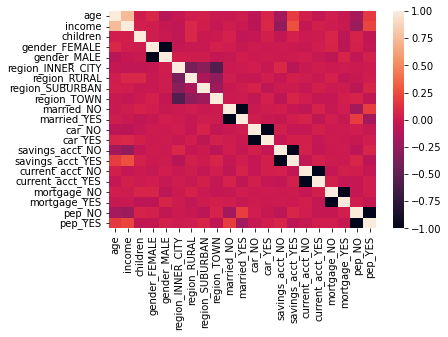

In [8]:
#10
import seaborn as sns

# bank_norm.corr(method=histogram_intersection)
corr = bank_norm.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Age and children along with age and income seem to be positively correlated. 